The idea is to score the different doses of a decryptM experiment as 11 patient samples.

ddPTM data: /media/kusterlab/internal_projects/active/TOPAS/Collaborations/ddPTM_RAW_files_for_search_queue/0__Phospho/FB_EGFR_3Inhibitors_ddPTM

ddFP data: /media/kusterlab/internal_projects/active/TOPAS/Collaborations/ddPTM_RAW_files_for_search_queue/0__Fullproteome/FB_EGFR_3Inhibitors_ddPTM_FP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

from bin.basket_scoring import read_basket_scores, read_sub_basket_scores


In [2]:
folder = '2023.08.09_MT_paper_cohort_with_decryptM'
results_folder = f'/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/{folder}'
use_zscored_input = False

In [3]:
df = read_basket_scores(results_folder, z_scored=use_zscored_input)
df.head()

,ABL,AKT,ALK,ALT_EJ,AURK,AXL,Apoptosis,BER,Biomarker,CDK4_6 activity,...,RHO_GTPases,SFKs,SHH,SHP2,SRC,TGFb,Tumorantigens,VEGFR,WNT,cellcycle
Sample,,,,,,,,,,,,,,,,,,,,,
Afatinib-0-nM,4.256361,-0.711533,2.397288,0.195141,10.450722,3.741593,2.828156,1.383445,2.291144,6.789357,...,11.142687,8.948225,4.448215,0.661379,14.806120,-1.436853,2.462066,1.822691,13.508137,9.962987
Afatinib-0.03-nM,4.949041,-0.311853,2.335831,0.095252,10.882240,4.551332,3.162618,4.000000,2.225354,6.771586,...,10.253864,10.925219,4.193992,0.686809,18.352125,-1.605914,2.467813,1.887796,12.368302,10.423952
Afatinib-0.3-nM,4.464381,2.279459,2.459550,0.326062,9.744547,2.078937,2.164809,4.000000,2.194130,3.768533,...,9.790037,10.291635,7.040603,0.353756,17.767347,-1.584297,2.415027,0.638503,17.419289,10.876954
Afatinib-1-nM,4.741149,-1.865166,2.751058,0.110250,10.089410,4.223237,3.412121,4.000000,2.150974,7.745094,...,9.985131,10.790793,3.660247,0.732003,18.440188,-1.373746,2.426346,1.758647,13.034169,10.871796
Afatinib-10-nM,4.938245,-1.974701,2.780526,0.283356,10.556981,4.504202,2.904224,4.000000,2.207809,8.043630,...,10.175723,11.359247,4.447079,0.792243,18.095165,-1.521257,2.396656,1.934767,12.807793,10.376024


In [4]:
# df.index = df.index.str.replace(r"-R\d+$", "", regex=True) # remove replicate suffixes
df = df.loc[~df.index.str.contains("targets_"), :]

exclude_baskets = [
    "ALT_EJ",
    "Apoptosis",
    "BER",
    "Biomarker",
    "FA",
    "HR",
    "IFN",
    "Immune_checkpoints",
    "Infiltration_Inflammation",
    "NER",
    "NHEJ",
    "RHO_GTPases",
    "SHP2",
    "TGFb",
    "Tumorantigens",
]
df = df.loc[:, ~df.columns.isin(exclude_baskets)]
df = df.replace(0, np.nan)

In [5]:
df_zscored = df
if not use_zscored_input:
    from bin.metrics import Metrics

    def drop_prefix(self, prefix):
        self.columns = self.columns.str.lstrip(prefix)
        return self
    pd.core.frame.DataFrame.drop_prefix = drop_prefix

    df_zscored = Metrics.get_zscore(df.T)
    df_zscored = df_zscored.drop_prefix('zscore_')
    df_zscored = df_zscored.T
df_zscored

2023-11-08 15:18:25,486 - INFO - Calculating z-scores


,ABL,AKT,ALK,AURK,AXL,CDK4_6 activity,DDR,EGFR,EPH,ERBB,...,PLK1,RAF,RAS,RET,SFKs,SHH,SRC,VEGFR,WNT,cellcycle
Sample,,,,,,,,,,,,,,,,,,,,,
Afatinib-0-nM,0.418795,-1.054465,0.313524,1.837307,0.417226,0.572423,0.747206,2.368975,1.793406,1.244145,...,0.960061,-0.063772,1.632681,-0.006421,0.816799,0.175685,1.901992,0.188364,1.707492,0.775939
Afatinib-0.03-nM,0.591022,-0.979217,0.288059,1.941516,0.587990,0.568601,0.619001,3.100444,3.277046,1.195542,...,0.959018,-0.470171,1.604337,0.115101,1.369618,0.088118,2.446896,0.212595,1.370864,0.891825
Afatinib-0.3-nM,0.470511,-0.491847,0.339324,1.666948,0.066728,-0.078785,0.534982,3.085148,2.204220,0.897408,...,0.917664,-0.239041,1.635854,0.024658,1.192295,1.069592,2.356841,-0.255894,2.869989,1.005753
Afatinib-1-nM,0.539325,-1.271811,0.460133,1.750116,0.518791,0.778010,0.682369,3.084297,2.862454,1.122253,...,0.978785,-0.505794,1.609544,0.072514,1.331982,-0.100057,2.460465,0.164528,1.567423,1.004455
Afatinib-10-nM,0.588337,-1.292460,0.472346,1.862960,0.578049,0.842254,0.633917,3.077511,3.265467,1.014156,...,0.912760,-0.623681,1.601664,-0.038367,1.491195,0.175294,2.407314,0.230078,1.500570,0.879774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRCM-SW-684,2.241822,0.357608,0.879630,1.474763,2.269273,2.080804,1.092898,0.473289,1.729757,0.767950,...,2.460765,1.252676,2.071197,-0.467571,1.216522,0.266335,0.845450,0.197842,1.060148,3.460685
SRCM-SW-827,1.550644,1.274842,0.742680,2.445318,1.376876,2.301985,-0.525056,0.873844,2.823175,1.663006,...,3.216508,1.481698,1.918169,-0.701944,0.883906,0.847391,1.416870,0.617047,1.264572,4.023482
SRCM-SW-982,1.407303,0.772080,0.630409,1.782567,1.693891,1.518433,1.024486,0.582060,2.000776,1.651834,...,3.390309,1.246400,2.224127,1.595097,0.673874,0.389838,1.160990,0.494437,1.492445,4.207878


In [6]:
df_zscored_filtered = df_zscored.filter(like='Afatinib-', axis=0)
doses = df_zscored_filtered.index.str.extract(r'-(\d+\.?\d*)-nM')[0].astype(float)
df_zscored_filtered['Dose'] = doses.values
df_zscored_filtered['log10(Dose)'] = np.log10(df_zscored_filtered['Dose'])
df_zscored_filtered['log10(Dose)'] = df_zscored_filtered['log10(Dose)'].replace(-np.inf, -3.0) # DMSO
df_zscored_filtered = df_zscored_filtered.sort_values('Dose')
df_zscored_filtered

/tmp/ipykernel_1514795/77950136.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zscored_filtered['Dose'] = doses.values
/home/matthewt/.cache/pypoetry/virtualenvs/wp3-sample-pipeline-OkE4pj9k-py3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_1514795/77950136.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zscored_filtered['log10(Dose)'] = np.log10(df_zscored_fil

,ABL,AKT,ALK,AURK,AXL,CDK4_6 activity,DDR,EGFR,EPH,ERBB,...,RAS,RET,SFKs,SHH,SRC,VEGFR,WNT,cellcycle,Dose,log10(Dose)
Sample,,,,,,,,,,,,,,,,,,,,,
Afatinib-0-nM,0.418795,-1.054465,0.313524,1.837307,0.417226,0.572423,0.747206,2.368975,1.793406,1.244145,...,1.632681,-0.006421,0.816799,0.175685,1.901992,0.188364,1.707492,0.775939,0.00,-3.000000
Afatinib-0.03-nM,0.591022,-0.979217,0.288059,1.941516,0.587990,0.568601,0.619001,3.100444,3.277046,1.195542,...,1.604337,0.115101,1.369618,0.088118,2.446896,0.212595,1.370864,0.891825,0.03,-1.522879
Afatinib-0.3-nM,0.470511,-0.491847,0.339324,1.666948,0.066728,-0.078785,0.534982,3.085148,2.204220,0.897408,...,1.635854,0.024658,1.192295,1.069592,2.356841,-0.255894,2.869989,1.005753,0.30,-0.522879
Afatinib-1-nM,0.539325,-1.271811,0.460133,1.750116,0.518791,0.778010,0.682369,3.084297,2.862454,1.122253,...,1.609544,0.072514,1.331982,-0.100057,2.460465,0.164528,1.567423,1.004455,1.00,0.000000
Afatinib-3-nM,0.463461,-0.894258,0.374021,1.995800,0.509683,0.665564,0.611388,3.035747,2.261119,1.300203,...,1.620346,-0.034093,0.847864,0.793472,2.169899,0.238215,1.868032,0.831738,3.00,0.477121
Afatinib-10-nM,0.588337,-1.292460,0.472346,1.862960,0.578049,0.842254,0.633917,3.077511,3.265467,1.014156,...,1.601664,-0.038367,1.491195,0.175294,2.407314,0.230078,1.500570,0.879774,10.00,1.000000
Afatinib-30-nM,0.617271,-0.993273,0.394916,1.909822,0.462647,0.777976,0.751115,3.085807,3.239519,1.294627,...,1.663489,-0.136495,1.339830,0.459501,2.480205,0.225509,1.890692,0.873502,30.00,1.477121
Afatinib-100-nM,0.472563,-0.323956,0.391759,2.002966,0.650189,0.679503,0.645785,2.511829,2.880914,1.315453,...,1.636531,-0.341059,1.105107,-0.628942,2.392458,0.350799,0.984183,0.831488,100.00,2.000000
Afatinib-300-nM,0.454611,-0.879283,0.400060,1.974688,0.375280,0.765140,0.510293,2.103302,2.948315,1.400703,...,1.610938,-0.317909,0.843936,0.353363,1.867067,0.233949,0.924719,0.703604,300.00,2.477121


In [7]:
def plot_dose_dependent_TUPAC(df_zscored_filtered, basket_name: str):
    df_zscored_filtered[['log10(Dose)', basket_name]].plot.scatter(x='log10(Dose)', y=basket_name)
    plt.ylabel(f'{basket_name} TUPAC score')
    plt.xlabel('log10(dose Afatinib) [nM]')
    labels = [item.get_text() for item in plt.gca().get_xticklabels()]
    labels[1] = 'DMSO'

    plt.gca().set_xticklabels(labels)
    plt.gca().set_ylim([-4, 4])
    plt.title(f"Afatinib - {basket_name} TUPAC score")
    plt.savefig(f'/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/MT/2023.08.21_decryptM_TUPAC_scores/{basket_name}_TUPAC_score.svg')

/tmp/ipykernel_1514795/1689599331.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(labels)
/tmp/ipykernel_1514795/1689599331.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(labels)
/tmp/ipykernel_1514795/1689599331.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(labels)
/tmp/ipykernel_1514795/1689599331.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(labels)
/tmp/ipykernel_1514795/1689599331.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(labels)
/tmp/ipykernel_1514795/1689599331.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(labels)


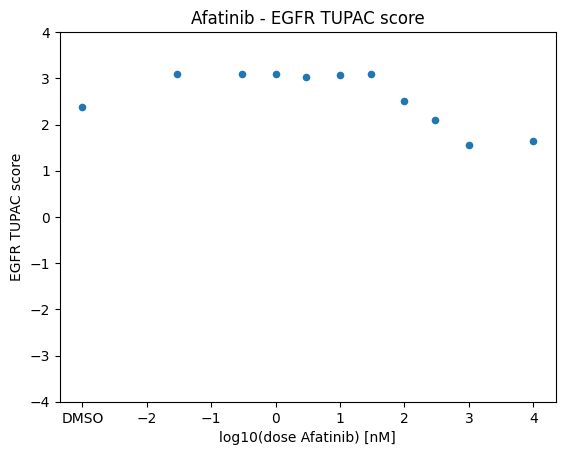

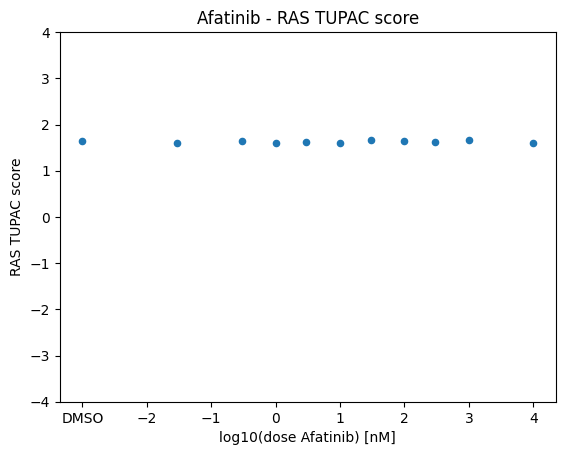

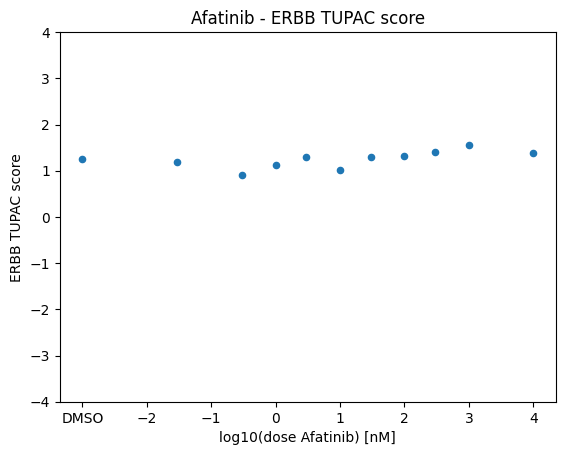

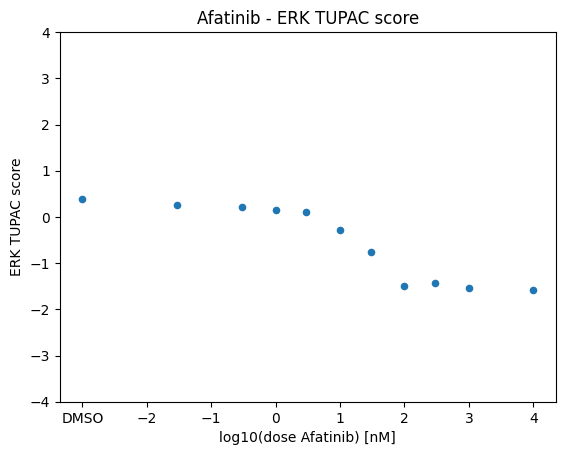

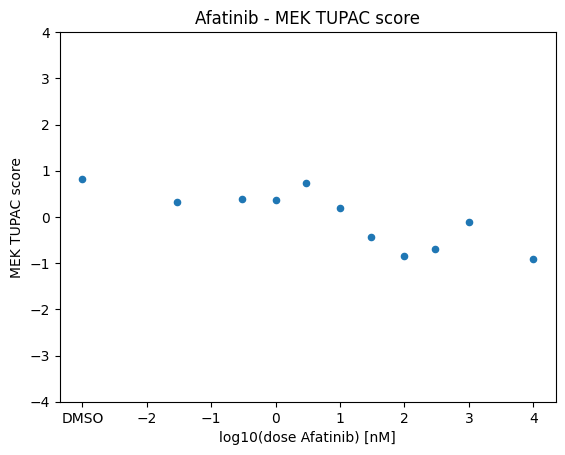

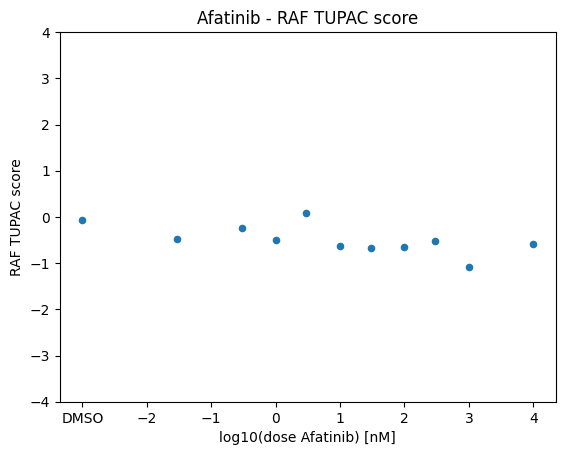

In [8]:
plot_dose_dependent_TUPAC(df_zscored_filtered, 'EGFR')
plot_dose_dependent_TUPAC(df_zscored_filtered, 'RAS')
plot_dose_dependent_TUPAC(df_zscored_filtered, 'ERBB')
plot_dose_dependent_TUPAC(df_zscored_filtered, 'ERK')
plot_dose_dependent_TUPAC(df_zscored_filtered, 'MEK')
plot_dose_dependent_TUPAC(df_zscored_filtered, 'RAF')

In [9]:
df_zscored_filtered.to_csv(f'{results_folder}/Afatinib_TUPAC_scores.tsv', sep='\t')

In [10]:
subbasket_df = read_sub_basket_scores(results_folder)
subbasket_df = subbasket_df.T
subbasket_df = subbasket_df.loc[~subbasket_df.index.str.contains("targets_"), :]
subbasket_df.head()

,ABL - RTK - expression,ABL - RTK - important phosphorylation,ABL - RTK - kinase activity,ABL - RTK - phosphorylation,ABL - proximal RTK signaling - expression,ABL - proximal RTK signaling - phosphorylation,AKT - AKT - expression,AKT - AKT - kinase activity,AKT - AKT - phosphorylation,AKT - AKT/mTOR activating sites - important phosphorylation,...,WNT - target genes - expression,cellcycle - DNA replication - expression,cellcycle - G1/S transition - expression,cellcycle - G1/S transition - kinase activity,cellcycle - G1/S transition - phosphorylation,cellcycle - G2/M transition - expression,cellcycle - G2/M transition - kinase activity,cellcycle - G2/M transition - phosphorylation,cellcycle - cell cycle activity - expression,cellcycle - cell cycle activity - phosphorylation
index,,,,,,,,,,,,,,,,,,,,,
Afatinib-0-nM,NaN,NaN,2.825828,0.262368,0.981249,0.186916,1.258601,2.057390,-0.958328,NaN,...,1.751715,2.222043,2.035902,0.257601,-0.522954,1.689278,0.407230,0.929005,2.222043,0.722837
Afatinib-0.03-nM,NaN,NaN,3.641444,0.062763,0.978821,0.266013,1.228674,0.933619,0.592084,NaN,...,1.698021,2.284588,2.070784,0.292406,-0.337168,1.737842,0.382854,0.967620,2.284588,0.740440
Afatinib-0.3-nM,NaN,NaN,3.292378,0.072629,0.868073,0.231301,0.785286,1.642909,2.597451,NaN,...,1.744381,2.010983,4.000000,0.051851,-0.894555,1.583746,0.443603,0.920653,2.010983,0.749690
Afatinib-1-nM,NaN,NaN,3.384564,0.147261,0.991452,0.217873,1.166510,0.950524,-0.830179,NaN,...,1.667329,2.223537,2.236771,0.334797,0.008370,1.729197,0.435561,0.903982,2.223537,0.776043
Afatinib-10-nM,NaN,NaN,3.516619,0.313769,0.969424,0.138434,0.593098,1.371554,-0.874030,NaN,...,1.708182,2.168182,2.200392,0.301639,-0.242847,1.726305,0.460133,0.911321,2.168182,0.682717


In [11]:
subbasket_df_zscored_filtered = subbasket_df.filter(like='Afatinib-', axis=0)
doses = subbasket_df_zscored_filtered.index.str.extract(r'-(\d+\.?\d*)-nM')[0].astype(float)
subbasket_df_zscored_filtered['Dose'] = doses.values
subbasket_df_zscored_filtered['log10(Dose)'] = np.log10(subbasket_df_zscored_filtered['Dose'])
subbasket_df_zscored_filtered['log10(Dose)'] = subbasket_df_zscored_filtered['log10(Dose)'].replace(-np.inf, -3.0) # DMSO
subbasket_df_zscored_filtered = subbasket_df_zscored_filtered.sort_values('Dose')
subbasket_df_zscored_filtered.head()

/tmp/ipykernel_1514795/4252793276.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subbasket_df_zscored_filtered['Dose'] = doses.values
/home/matthewt/.cache/pypoetry/virtualenvs/wp3-sample-pipeline-OkE4pj9k-py3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_1514795/4252793276.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subbasket_df_zscored_filtered['log10(Dose)'] =

,ABL - RTK - expression,ABL - RTK - important phosphorylation,ABL - RTK - kinase activity,ABL - RTK - phosphorylation,ABL - proximal RTK signaling - expression,ABL - proximal RTK signaling - phosphorylation,AKT - AKT - expression,AKT - AKT - kinase activity,AKT - AKT - phosphorylation,AKT - AKT/mTOR activating sites - important phosphorylation,...,cellcycle - G1/S transition - expression,cellcycle - G1/S transition - kinase activity,cellcycle - G1/S transition - phosphorylation,cellcycle - G2/M transition - expression,cellcycle - G2/M transition - kinase activity,cellcycle - G2/M transition - phosphorylation,cellcycle - cell cycle activity - expression,cellcycle - cell cycle activity - phosphorylation,Dose,log10(Dose)
index,,,,,,,,,,,,,,,,,,,,,
Afatinib-0-nM,NaN,NaN,2.825828,0.262368,0.981249,0.186916,1.258601,2.057390,-0.958328,NaN,...,2.035902,0.257601,-0.522954,1.689278,0.407230,0.929005,2.222043,0.722837,0.00,-3.000000
Afatinib-0.03-nM,NaN,NaN,3.641444,0.062763,0.978821,0.266013,1.228674,0.933619,0.592084,NaN,...,2.070784,0.292406,-0.337168,1.737842,0.382854,0.967620,2.284588,0.740440,0.03,-1.522879
Afatinib-0.3-nM,NaN,NaN,3.292378,0.072629,0.868073,0.231301,0.785286,1.642909,2.597451,NaN,...,4.000000,0.051851,-0.894555,1.583746,0.443603,0.920653,2.010983,0.749690,0.30,-0.522879
Afatinib-1-nM,NaN,NaN,3.384564,0.147261,0.991452,0.217873,1.166510,0.950524,-0.830179,NaN,...,2.236771,0.334797,0.008370,1.729197,0.435561,0.903982,2.223537,0.776043,1.00,0.000000
Afatinib-3-nM,NaN,NaN,3.016709,0.304978,0.987070,0.127270,1.141627,2.026321,-0.069918,NaN,...,2.195296,0.237167,-0.480057,1.685768,0.447902,0.868274,2.241939,0.746732,3.00,0.477121


/tmp/ipykernel_1514795/1689599331.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(labels)
/tmp/ipykernel_1514795/1689599331.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(labels)


/tmp/ipykernel_1514795/1689599331.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(labels)
/tmp/ipykernel_1514795/1689599331.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(labels)
/tmp/ipykernel_1514795/1689599331.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(labels)
/tmp/ipykernel_1514795/1689599331.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(labels)


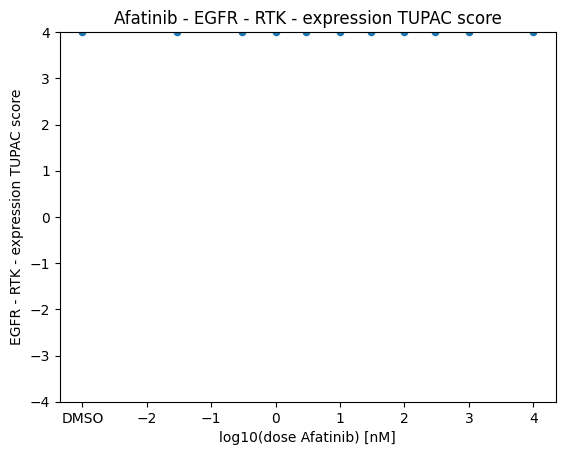

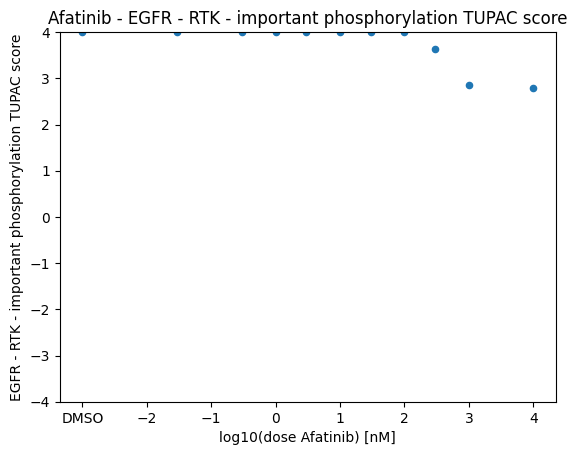

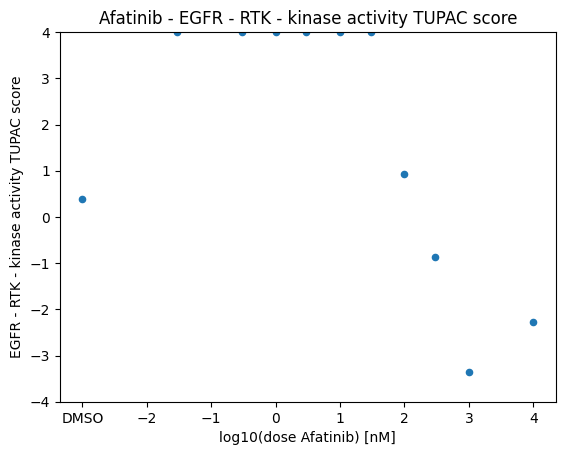

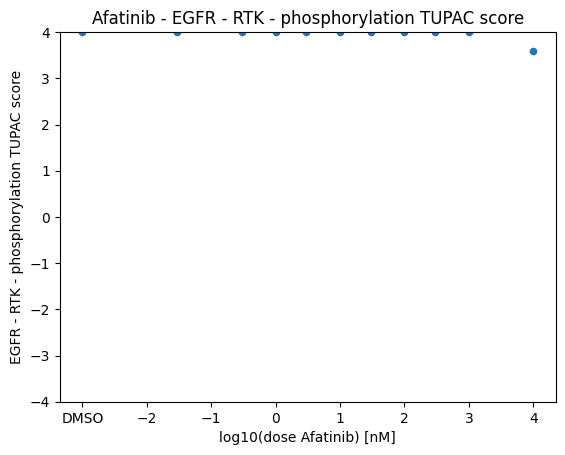

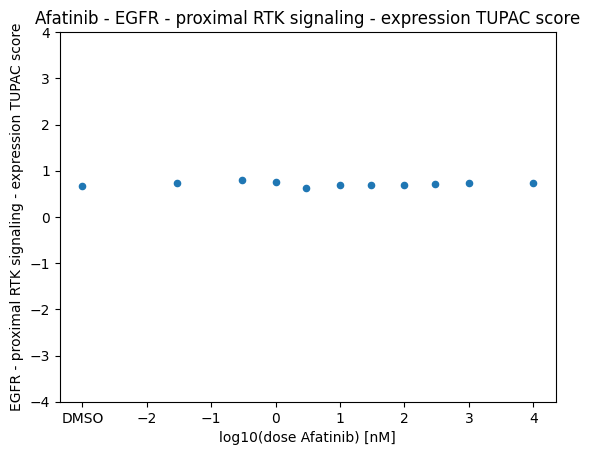

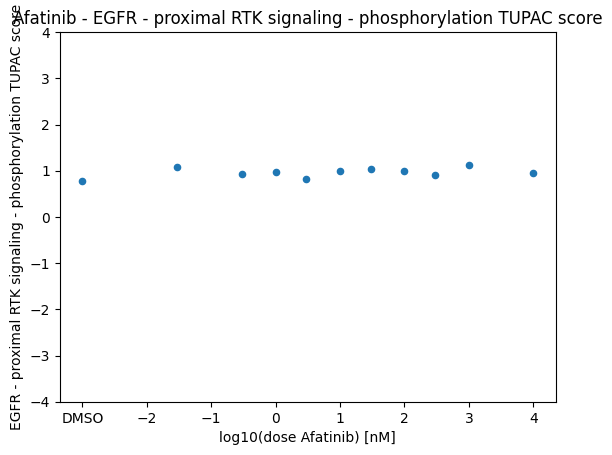

In [12]:
#  'EGFR - RTK - expression',
#  'EGFR - RTK - important phosphorylation',
#  'EGFR - RTK - kinase activity',
#  'EGFR - RTK - phosphorylation',
#  'EGFR - proximal RTK signaling - expression',
#  'EGFR - proximal RTK signaling - phosphorylation',

plot_dose_dependent_TUPAC(subbasket_df_zscored_filtered, 'EGFR - RTK - expression')
plot_dose_dependent_TUPAC(subbasket_df_zscored_filtered, 'EGFR - RTK - important phosphorylation')
plot_dose_dependent_TUPAC(subbasket_df_zscored_filtered, 'EGFR - RTK - kinase activity')
plot_dose_dependent_TUPAC(subbasket_df_zscored_filtered, 'EGFR - RTK - phosphorylation')
plot_dose_dependent_TUPAC(subbasket_df_zscored_filtered, 'EGFR - proximal RTK signaling - expression')
plot_dose_dependent_TUPAC(subbasket_df_zscored_filtered, 'EGFR - proximal RTK signaling - phosphorylation')